In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('haberman.csv')
df.head()

,patient_age,operation_year,positive_axilliary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


General Statistics


In [71]:
df.shape

(306, 4)

In [72]:
df['survival_status'].value_counts()

survival_status
1    225
2     81
Name: count, dtype: int64

In [73]:
df["survival_status"]=df['survival_status'].map({1:"Yes", 2:"No"})

In [74]:
df.describe()

,patient_age,operation_year,positive_axilliary_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


In [75]:
survival_yes = df[df['survival_status'] == 'Yes']
survival_yes.describe()

,patient_age,operation_year,positive_axilliary_nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [76]:
survival_no = df[df['survival_status'] == 'No']
survival_no.describe()

,patient_age,operation_year,positive_axilliary_nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


Uni-variate Analysis


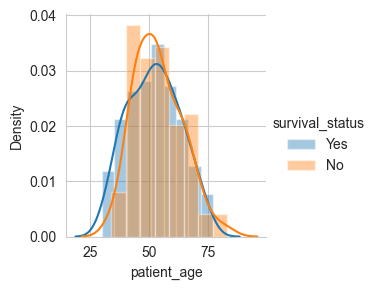

In [77]:
sns.FacetGrid(df, hue = "survival_status").map(sns.distplot, "patient_age").add_legend()

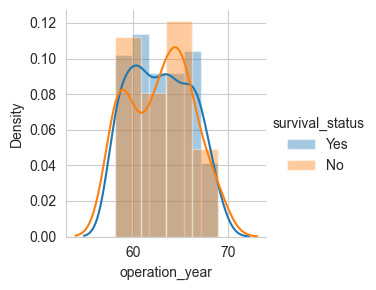

In [78]:
sns.FacetGrid(df, hue = "survival_status").map(sns.distplot, "operation_year").add_legend()

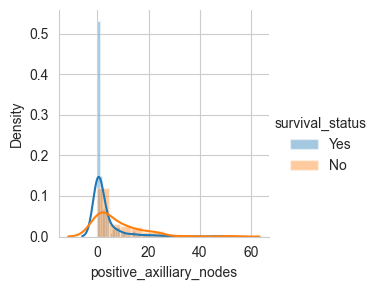

In [79]:
sns.FacetGrid(df, hue="survival_status").map(sns.distplot, "positive_axilliary_nodes").add_legend()

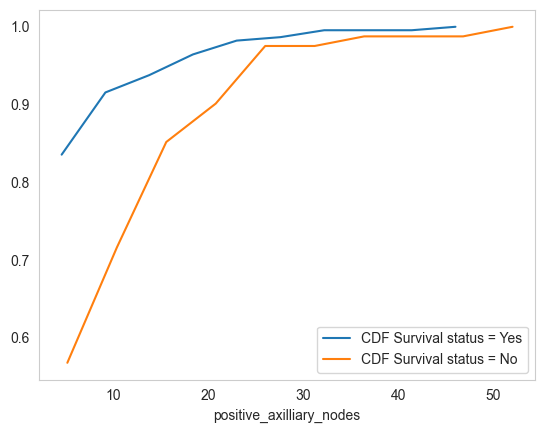

In [80]:
counts_yes, bin_edges_yes = np.histogram(survival_yes['positive_axilliary_nodes'], density=True)
pdf_yes = counts_yes / sum(counts_yes)
cdf_yes = np.cumsum(pdf_yes)
plt.plot(bin_edges_yes[1:], cdf_yes, label='CDF Survival status = Yes')

# For Survival status = No
counts_no, bin_edges_no = np.histogram(survival_no['positive_axilliary_nodes'], density=True)
pdf_no = counts_no / sum(counts_no)
cdf_no = np.cumsum(pdf_no)
plt.plot(bin_edges_no[1:], cdf_no, label='CDF Survival status = No')

plt.legend()
plt.xlabel("positive_axilliary_nodes")
plt.grid()
plt.show()

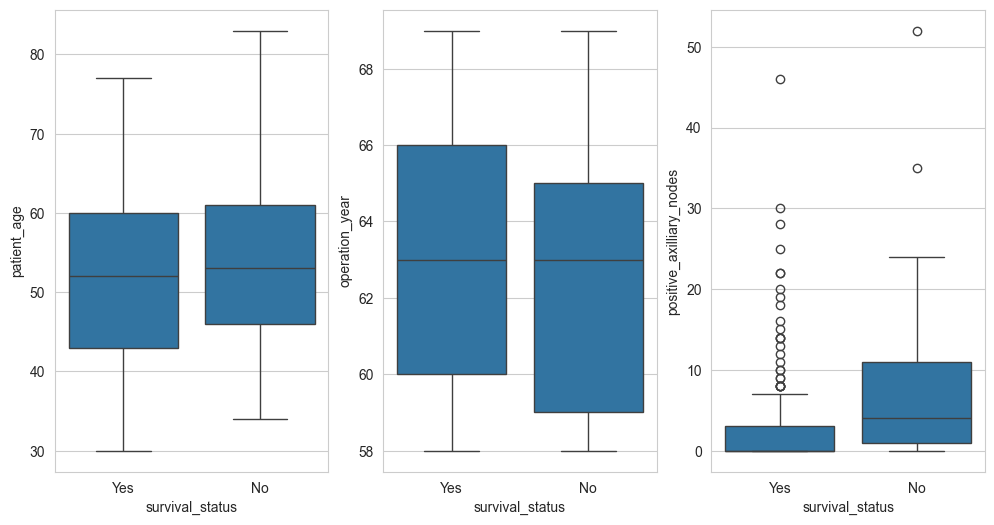

In [81]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='survival_status', y='patient_age', data=df)

plt.subplot(1, 3, 2)
sns.boxplot(x='survival_status', y='operation_year', data=df)

plt.subplot(1, 3, 3)
sns.boxplot(x='survival_status', y='positive_axilliary_nodes', data=df)

plt.show()

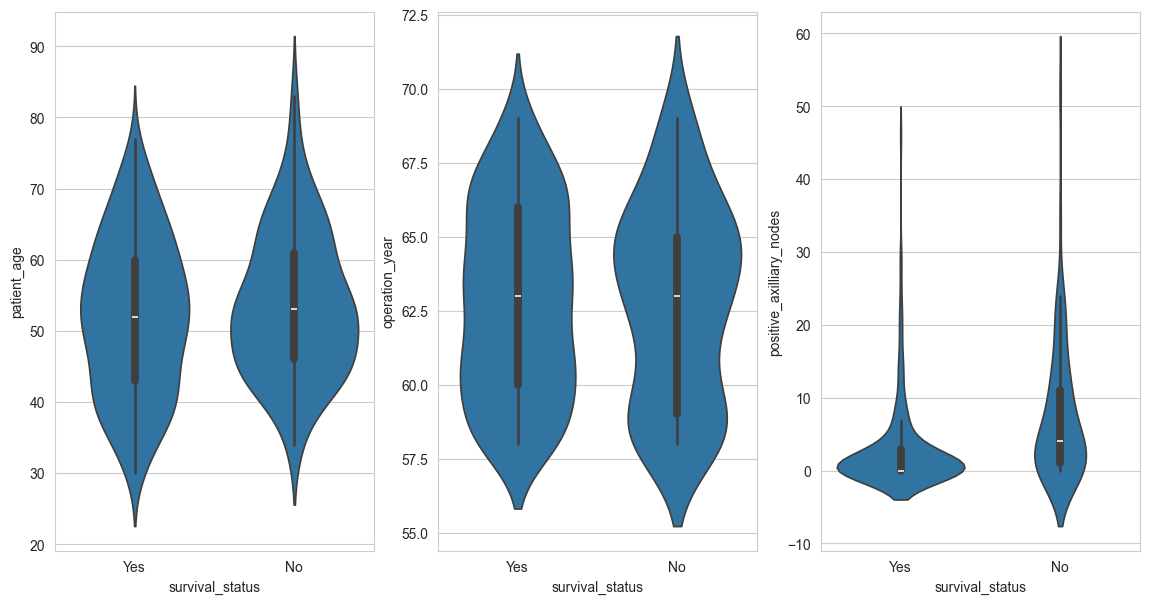

In [82]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
sns.violinplot(x='survival_status', y='patient_age', data=df)

plt.subplot(1, 3, 2)
sns.violinplot(x='survival_status', y='operation_year', data=df)

plt.subplot(1, 3, 3)
sns.violinplot(x='survival_status', y='positive_axilliary_nodes', data=df)

plt.show()

Bi-Variate Analysis


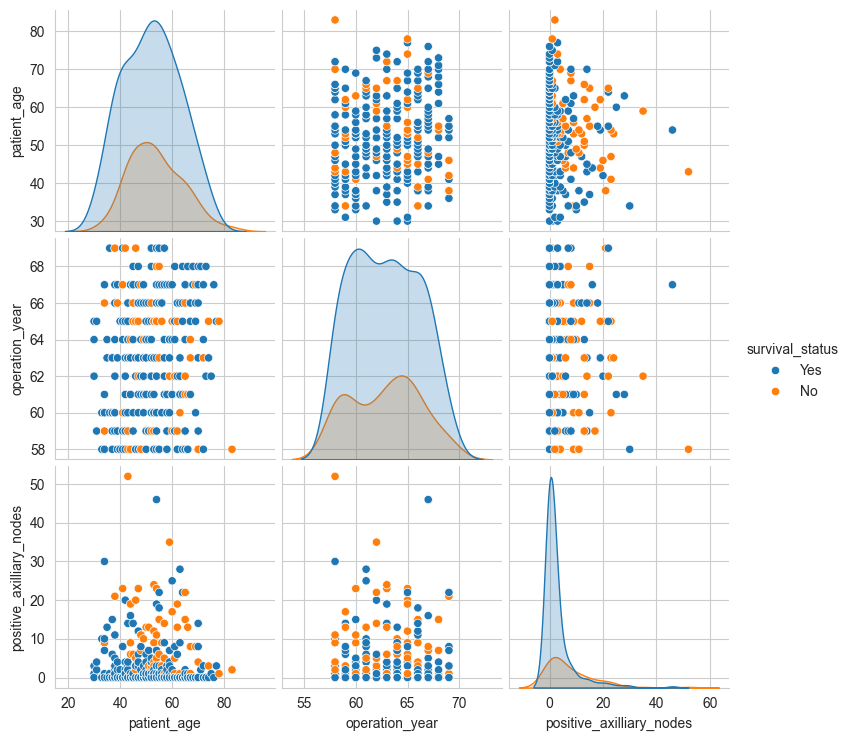

In [63]:
sns.set_style("whitegrid") 
sns.pairplot(df, hue = "survival_status") 
plt.show()

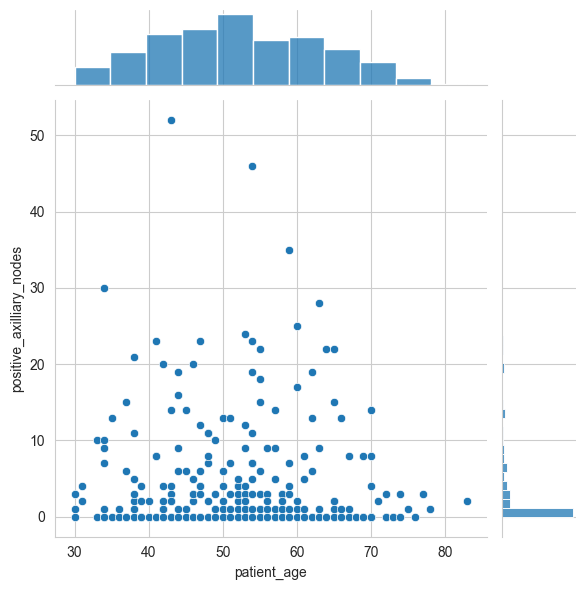

In [64]:
sns.jointplot(x = "patient_age", y = "positive_axilliary_nodes", data = df) 
plt.show()

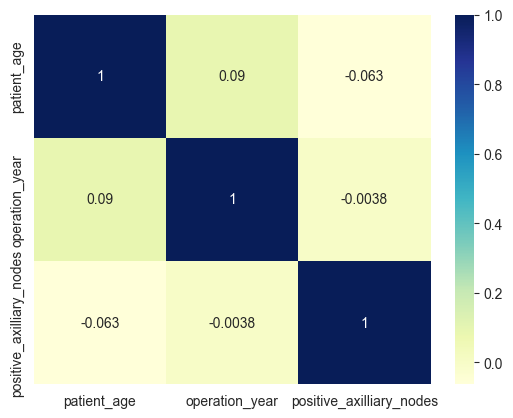

In [68]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True)
plt.show()